# A POWER BI DASHBOARD PROJECT

## Business Understanding

#### Team: Team Namibia

<a id="top"></a>

## Table of Contents


[**Business Understanding**](#Business-Understanding)

[**Data Understanding**](#Data-Understanding) 

- [**Load Data**](#Load-Data)
- [**Data Inspection**](#Inital-Data-Inspection)
- [**Data Quality Assessment**](#Data-Quality-Assessment)

[**Data Cleaning**](#Data-CLeaning) 

[**Exploratory Data Analysis**](#exploratory-data-analysis)

[**Analytical Questions**](#analytical-questions)
 

#### Problem Statement:
Team Namibia has been assigned to design and deliver an end-to-end business intelligence solution. Our client has collected transactional data for the year 2019 but hasn’t been able to put it to good use. The client hopes we can analyze the data and put together a report to help them find opportunities to drive more sales and work more efficiently. 

#### Objective
In this analysis, we aim to:
- Identify key trends and patterns in the 2019 transactional data.
- Analyze sales performance and uncover opportunities to drive more sales.
- Evaluate product performance and categorize products based on price levels.
- Identify cities with the highest product deliveries.
- Identify effective working processes

#### Analytical Questions
1. How much money did we make this year? 
   
2. Can we identify any seasonality in the sales? 

3. What are our best and worst-selling products?

4. How do sales compare to previous months or weeks?

5. Which cities are our products delivered to most?

6. How do product categories compare in revenue generated and quantities ordered?

7. You are required to show additional details from your findings in your data. 

- NB: Products with unit prices above $99.99 should be labeled high-level products otherwise they should be basic level.

#### Hypothesis
- Null Hypothesis (H0): There are no significant differences in Amount amongst the group(columns) of factors being tested.
- Alternative Hypothesis (H1): There are significant differences in Amount amongst the group(columns) of factors being tested.

# Data Understanding

[Back to top](#top)

Sales data was collected for each month in the entire year of 2019. 
The data for the first half of the year (January to June) was collected in Excel and saved as CSV files before management decided to use databases to store their data. 

## Load Data

### Import packages

In [130]:
# Import the pyodbc library to handle ODBC database connections
# Import the dotenv function to load environment variables from a .env file
import pyodbc 
from dotenv import dotenv_values    

# Import the warnings library to handle warning messages
import warnings
warnings.filterwarnings('ignore')       

import pandas as pd 
import numpy as np
import seaborn as sns

import glob
import os

### Load csv files

In [131]:

# Define the folder path
folder_path = r"\\Mac\Home\Downloads\Business-Analytics-Project\dataset"

# Get a list of all CSV files
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Load all CSV files and concatenate them into a single DataFrame
first_half = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

first_half.shape


### Load  Database

#### Establishing a connection to the SQL database

In [132]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the .env file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")

# Create the connection string using the retrieved credentials
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


'DRIVER={SQL Server};SERVER=dap-projects-database.database.windows.net;DATABASE=dapDB;UID=capstone;PWD=Z7x@8pM$2w;MARS_Connection=yes;MinProtocolVersion=TLSv1.2;'

#### Load data from database

In [133]:
# Establish a connection to the database using the connection string
connection = pyodbc.connect(connection_string) 

# Define the SQL query to list all tables (for SQL Server)
query = """
SELECT TABLE_NAME 
FROM INFORMATION_SCHEMA.TABLES 
WHERE TABLE_TYPE = 'BASE TABLE';
"""

# Execute the SQL query and fetch the result into a pandas DataFrame using the established database connection
tables = pd.read_sql(query, connection)

tables

,TABLE_NAME
0,Sales_July_2019
1,Sales_August_2019
2,Sales_September_2019
3,Sales_October_2019
4,Sales_November_2019
5,Sales_December_2019


In [134]:
# Connection to each of the table
query1 = "Select * from Sales_July_2019"
query2 = "Select * from Sales_August_2019"
query3 = "Select * from Sales_September_2019"
query4 = "Select * from Sales_October_2019"
query5 = "Select * from Sales_November_2019"
query6 = "Select * from Sales_December_2019"

# Execute the SQL query and fetch the result
july_df = pd.read_sql(query1, connection)
august_df = pd.read_sql(query2, connection)
september_df = pd.read_sql(query3, connection)
october_df = pd.read_sql(query4, connection)
november_df = pd.read_sql(query5, connection)
december_df = pd.read_sql(query6, connection)

# Define the dictionary with DataFrames
half_2 = {
    'july': july_df,
    'august': august_df,
    'september': september_df,
    'october': october_df,
    'november': november_df,
    'december': december_df
}

# Iterate over the dictionary
for month, df in half_2.items():
    print(f'{month}')
    print(df.columns)
    print(df.shape)
    print('=' * 50)

july
Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')
(14371, 6)
august
Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')
(12011, 6)
september
Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')
(11686, 6)
october
Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')
(20379, 6)
november
Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')
(17661, 6)
december
Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')
(25117, 6)


In [135]:
# Merge all DataFrames into one
second_half = pd.concat(half_2, ignore_index=True)
print('Second half of the year merged data:', second_half.shape)

Second half of the year merged data: (101225, 6)


In [136]:
#View the column names of the first half data
first_half.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [137]:
#View the column names of the second half data
second_half.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

In [138]:
#Renaming the first half data columns to match the second half's
first_half.rename(columns={
    'Order ID': 'Order_ID', 
    'Quantity Ordered': 'Quantity_Ordered',
    'Price Each':'Price_Each',
    'Order Date': 'Order_Date',
    'Purchase Address' : 'Purchase_Address'
}, inplace=True)

#Verifying the column names of the first half data have been corrected
first_half.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

### Merged Data

In [139]:
# Merging both halfs into 2019_df
Merged_df = pd.concat([first_half, second_half], axis=0, ignore_index='True')

print('1st half year data:', first_half.shape[0])
print('2st half year data:', second_half.shape[0])
print('Total year 2019 data:', Merged_df.shape[0])


1st half year data: 85625
2st half year data: 101225
Total year 2019 data: 186850


In [140]:
Merged_df.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

## Inital Data Inspection

[Back to top](#top)


This involves viewing different aspects of the loaded data that would provide insights on the properties of the data and how to handle it moving forward

In [141]:
#viewing the first few rows
Merged_df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [142]:
#viewing the last few rows
Merged_df.tail()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
186845,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
186846,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
186847,319668.0,Vareebadd Phone,1.0,400.0,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
186848,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"
186849,319670.0,Bose SoundSport Headphones,1.0,99.989998,2021-12-19 21:45:00.0000000,"747 Chestnut St, Los Angeles, CA 90001"


In [143]:
#viewing the datatypes of the different columns
Merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186110 non-null  object
 1   Product           186305 non-null  object
 2   Quantity_Ordered  186110 non-null  object
 3   Price_Each        186110 non-null  object
 4   Order_Date        186110 non-null  object
 5   Purchase_Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [144]:
#Summary Statistics on the merged data
Merged_df.describe()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
count,186110,186305,186110.0,186110.00,186110,186305
unique,178438,20,18.0,40.00,142396,140788
top,Order ID,USB-C Charging Cable,1.0,11.95,Order Date,Purchase Address
freq,160,21903,91347.0,11951.00,160,355


### Observations
There are 6 columns in the merged dataset with 186,850 rows. Two of the columns (Product and Purchase Address) are the only categorical columns with the rest being numerical. 

Every column has missing data. However, out of the 186,860 rows the categorical columns (Product and Purchase Address) have 186305 rows with the numerical columns (Order_ID, Price, Quantity Ordered and Order Date) each have 186,110 rows. 

All the columns have an object datatype including the  numerical ones. It was observed that in the concatenating, each month's transaction had a header row which appeared as an entry during the merging. This can be observed as Order Date, Order ID and Purchase Address being the top entry within their columns

## Data Quality Assessment

This is where the quality of the data is assessed, including completeness, accuracy, consitency and relevance. This is a crucial step in understanding the shortcomings of our data and being able to use that knowledge to plan how to handle/clean the data.

In [145]:
# Checking for missing values and percentage
missing_values = Merged_df.isnull().sum()
total_values = len(Merged_df)

# Create a DataFrame to display both count and percentage
missing_percentage = (missing_values / total_values * 100).round(2)

# Combine both count and percentage into a new DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

missing_data


,Missing Values,Percentage (%)
Order_ID,740,0.40
Product,545,0.29
Quantity_Ordered,740,0.40
Price_Each,740,0.40
Order_Date,740,0.40
Purchase_Address,545,0.29


In [146]:
#Check for Duplicate rows
Merged_df.duplicated().sum()

1161

In [147]:
#Assessing the column datatypes
Merged_df.dtypes

Order_ID            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
dtype: object

In [148]:
Merged_df['Order_Date'].sample

<bound method NDFrame.sample of 0                      04/19/19 08:46
1                                 NaN
2                      04/07/19 22:30
3                      04/12/19 14:38
4                      04/12/19 14:38
                     ...             
186845    2011-12-19 20:58:00.0000000
186846    2001-12-19 12:01:00.0000000
186847    2009-12-19 06:43:00.0000000
186848    2003-12-19 10:39:00.0000000
186849    2021-12-19 21:45:00.0000000
Name: Order_Date, Length: 186850, dtype: object>

In [149]:
# Displaying rows where all columns are NaN (empty)
empty_rows = Merged_df[Merged_df.isnull().all(axis=1)]
empty_rows


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184678,NaN,None,NaN,NaN,None,None
184695,NaN,None,NaN,NaN,None,None
185042,NaN,None,NaN,NaN,None,None
185729,NaN,None,NaN,NaN,None,None


In [150]:
#showing the duplicate rows of the header Product and Purchase Address
Merged_df[(Merged_df['Product']=='Product') & (Merged_df['Purchase_Address']=='Purchase Address')]

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184931,NaN,Product,NaN,NaN,None,Purchase Address
185070,NaN,Product,NaN,NaN,None,Purchase Address
185481,NaN,Product,NaN,NaN,None,Purchase Address
185925,NaN,Product,NaN,NaN,None,Purchase Address


### Observations 
There are several empty rows in the dataset across all the columns (at least 545 rows). Some of the rows have headers being repeated. For example there are 160 duplicate rows of all the column headers. Additionally, Product and Purchase Address columns have an extra 195 rows where only those two headers repeat but all other columns have missing values. This is why all columns have 740 missing values but those two have only 545 missing values (195 less).

This suggests that a large portion of the 1161 duplicate rows are completely empty and filled with  duplicates of certain column headers. Nonetheless, the duplicate rows would be dropped. The Order_ID is likely not to play any relevant role so that also would be dropped. After dropping the duplicates and with the percentage of missing values being very low (less than half a percent), rows with missing values would be dropped.

Product and Purchase Address are the only columns with the correct data types. Order_ID and Quantity Ordered should be integers, Order Date should be Datetime whilst Price Each should be float.

The Order Date have different formatting with some having errors as this dataset represents 2019 calendar year yet some entries are before or after 2019.

## Data Cleaning
[Back to top](#top)

Unclean data (missing data, wrong data types, data with errors, duplicate data, etc) can lead to issues and errors during analysis and as such it is crucial we clean the data before proceeding with any analysis.

In [151]:
#making a copy of the dataset before cleaning it
Merged_df2= Merged_df.copy()

In [152]:
#dropping duplicate rows and Order_ID column
Merged_df.drop_duplicates(inplace=True)
Merged_df.drop(columns= ['Order_ID'], inplace=True)

In [153]:
#viewing missing values after dropping duplicates
Merged_df.isnull().sum()

Product             1
Quantity_Ordered    2
Price_Each          2
Order_Date          2
Purchase_Address    1
dtype: int64

In [154]:
#Dropping rows with any missing values
clean_df= Merged_df.dropna()

In [155]:
#verifying that clean.df has no missing values
clean_df.isna().sum()

Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

In [156]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 186849
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product           185687 non-null  object
 1   Quantity_Ordered  185687 non-null  object
 2   Price_Each        185687 non-null  object
 3   Order_Date        185687 non-null  object
 4   Purchase_Address  185687 non-null  object
dtypes: object(5)
memory usage: 8.5+ MB


In [157]:
# Correcting data types for numeric columns
numeric_columns = ['Quantity_Ordered', 'Price_Each'] 

# Applying pd.to_numeric to ensure numeric data types 
clean_df[numeric_columns] = clean_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Converting Order_Date to datetime
clean_df['Order_Date'] = pd.to_datetime(clean_df['Order_Date'], errors='coerce')

#converting Quantity ordered from a float into an integer
clean_df['Quantity_Ordered']= clean_df['Quantity_Ordered'].fillna(0).astype(int)

#converting Product from object into category
clean_df['Product']= clean_df['Product'].astype('category')

# Displaying the data types of columns after conversion
clean_df.dtypes


Product                   category
Quantity_Ordered             int32
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
dtype: object

In [158]:
#checking for missing values after changing data types
clean_df.isna().sum()

Product             0
Quantity_Ordered    0
Price_Each          1
Order_Date          1
Purchase_Address    0
dtype: int64

In [159]:
#dropping missing values
clean_df.dropna(inplace=True)

#verifying that we have no missing values after changing data types
clean_df.isna().sum()

Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

### Viewing the Unique values in each column

In [160]:
#number of unique values in each column
clean_df.nunique()

Product                 19
Quantity_Ordered         9
Price_Each              28
Order_Date          142395
Purchase_Address    140787
dtype: int64

In [161]:
#Viewing the unique values in the column Product
clean_df['Product'].unique()

['USB-C Charging Cable', 'Bose SoundSport Headphones', 'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop', ..., 'LG Dryer', 'ThinkPad Laptop', 'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor']
Length: 19
Categories (20, object): ['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor', '34in Ultrawide Monitor', ..., 'USB-C Charging Cable', 'Vareebadd Phone', 'Wired Headphones', 'iPhone']

In [162]:
# Dictionary to map products to their categories
product_categories = {
    'USB-C Charging Cable': 'Cables and Chargers',
    'Lightning Charging Cable': 'Cables and Chargers',
    'Bose SoundSport Headphones': 'Headphones and Earphones',
    'Wired Headphones': 'Headphones and Earphones',
    'Apple Airpods Headphones': 'Headphones and Earphones',
    'Google Phone': 'Phones and Accessories',
    'iPhone': 'Phones and Accessories',
    'Vareebadd Phone': 'Phones and Accessories',
    'Macbook Pro Laptop': 'Laptops',
    'ThinkPad Laptop': 'Laptops',
    '27in 4K Gaming Monitor': 'Monitors and Displays',
    '27in FHD Monitor': 'Monitors and Displays',
    '20in Monitor': 'Monitors and Displays',
    '34in Ultrawide Monitor': 'Monitors and Displays',
    'Flatscreen TV': 'Monitors and Displays',
    'AA Batteries (4-pack)': 'Batteries',
    'AAA Batteries (4-pack)': 'Batteries',
    'LG Dryer': 'Home Appliances',
    'LG Washing Machine': 'Home Appliances'
}

# creating a new column named Product category that would map the products
clean_df['Product_Category'] = clean_df['Product'].map(product_categories)

# Display the new category column along with the product column
clean_df[['Product', 'Product_Category']]


,Product,Product_Category
0,USB-C Charging Cable,Cables and Chargers
2,Bose SoundSport Headphones,Headphones and Earphones
3,Google Phone,Phones and Accessories
4,Wired Headphones,Headphones and Earphones
5,Wired Headphones,Headphones and Earphones
...,...,...
186845,Lightning Charging Cable,Cables and Chargers
186846,AA Batteries (4-pack),Batteries
186847,Vareebadd Phone,Phones and Accessories
186848,Wired Headphones,Headphones and Earphones


In [163]:
#Viewing the unique values in the column Quantity
clean_df['Quantity_Ordered'].unique()

array([2, 1, 3, 5, 4, 7, 6, 9, 8])

In [164]:
#Viewing the unique values in the column Price Each
clean_df['Price_Each'].unique()

array([  11.95      ,   99.99      ,  600.        ,   11.99      ,
       1700.        ,   14.95      ,  389.99      ,    3.84      ,
        150.        ,    2.99      ,  700.        ,  300.        ,
        149.99      ,  109.99      ,  999.99      ,  400.        ,
        379.99      ,    3.83999991,    2.99000001,   99.98999786,
         11.94999981,   14.94999981,  379.98999023,   11.98999977,
        149.99000549,  109.98999786,  999.98999023,  389.98999023])

In [165]:
def round_prices(df, column_name):
    """
    Rounds the values in the specified column of the DataFrame to two decimal places.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the column to be rounded.
    column_name (str): The name of the column to round.
    
    Returns:
    pd.DataFrame: DataFrame with rounded values in the specified column.
    """
    # Round the values in the specified column to 2 decimal places
    df[column_name] = df[column_name].round(2)
    return df



In [166]:
#renaming the price column
clean_df.rename(columns={'Price_Each' : 'Price'}, inplace=True)

# Rounding up the values in the column Price
clean_df = round_prices(clean_df, 'Price')
clean_df['Price'].unique()

array([  11.95,   99.99,  600.  ,   11.99, 1700.  ,   14.95,  389.99,
          3.84,  150.  ,    2.99,  700.  ,  300.  ,  149.99,  109.99,
        999.99,  400.  ,  379.99])

In [167]:
# Extract the city name from 'Purchase_Address'
clean_df['City'] = clean_df['Purchase_Address'].apply(lambda x: x.split(',')[1].strip())

# Display the new category column along with the product column
clean_df[['Purchase_Address', 'City']]


,Purchase_Address,City
0,"917 1st St, Dallas, TX 75001",Dallas
2,"682 Chestnut St, Boston, MA 02215",Boston
3,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
5,"333 8th St, Los Angeles, CA 90001",Los Angeles
...,...,...
186845,"14 Madison St, San Francisco, CA 94016",San Francisco
186846,"549 Willow St, Los Angeles, CA 90001",Los Angeles
186847,"273 Wilson St, Seattle, WA 98101",Seattle
186848,"778 River St, Dallas, TX 75001",Dallas


In [171]:
clean_df31= clean_df.copy()

In [172]:
#a function to clean the Order Date
def clean_order_date(df, date_column):
    def correct_date_format(date_str):
        try:
            # Split the date string by space to separate the date and time
            date_part, time_part = date_str.split(' ')
            
            # Split the date part by '-'
            parts = date_part.split('-')
            
            # Extract the year, month, and day
            year = int(parts[0])
            month = int(parts[1])
            day = int(parts[2])
            
            # Extract the last two digits of the year to use as the day
            correct_day = int(str(year)[-2:])
            
            # Construct the corrected date string in YYYY-MM-DD HH:MM:SS format
            corrected_date_str = f"2019-{month:02d}-{correct_day:02d} {time_part}"
            
            # Convert to datetime using the correct format
            date = pd.to_datetime(corrected_date_str, format='%Y-%m-%d %H:%M:%S', errors='coerce')
            
            return date
        except Exception as e:
            return pd.NaT

    # Convert the column to string in case it's not already
    df[date_column] = df[date_column].astype(str)
    
    # Apply the function to clean the dates
    df[date_column] = df[date_column].apply(correct_date_format)

    # Drop rows with NaT (invalid dates)
    df_cleaned = df.dropna(subset=[date_column])

    return df_cleaned

# Example usage:
clean_df31 = clean_order_date(clean_df31, 'Order_Date')
clean_df31['Order_Date']



0        2019-04-19 08:46:00
2        2019-04-19 22:30:00
3        2019-04-19 14:38:00
4        2019-04-19 14:38:00
5        2019-04-19 09:27:00
                 ...        
186845   2019-12-11 20:58:00
186846   2019-12-01 12:01:00
186847   2019-12-09 06:43:00
186848   2019-12-03 10:39:00
186849   2019-12-21 21:45:00
Name: Order_Date, Length: 185686, dtype: datetime64[ns]

## Exploratory Data Analysis

### Univariate Analysis
#### Distribution of Numerical Columns

Here we look into the distribution of two of the numerical columns: Quantity Prdered and Price

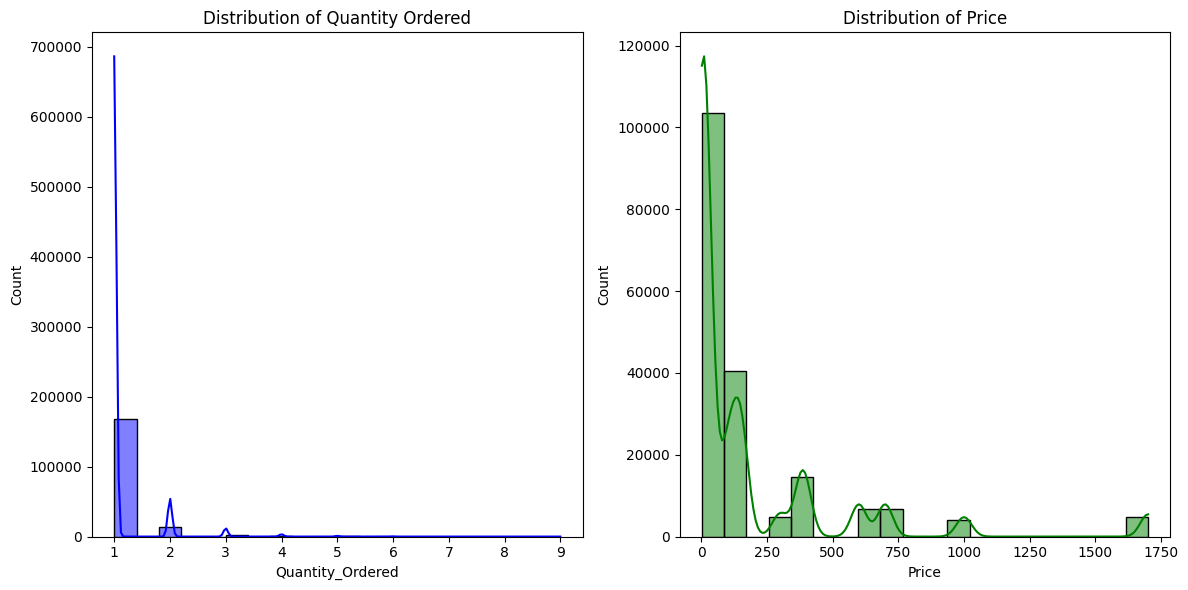

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Distribution of Quantity Ordered
plt.subplot(1, 2, 1)
sns.histplot(clean_df['Quantity_Ordered'], bins=20, kde=True, color='blue')
plt.title('Distribution of Quantity Ordered')

# Distribution of Price
plt.subplot(1, 2, 2)
sns.histplot(clean_df['Price'], bins=20, kde=True, color='green')
plt.title('Distribution of Price')

plt.tight_layout()
plt.show()


It can be seen that the data is skewed towards the lower values for both quantity ordered and Price. This indicates that when customers purchase items, they do not buy in bulk/larger quantities but rather prefer to buy cheaper products in smaller quantities. The highest peak was for a single item ordered which is very common amongst customers to purchase a single unit of the electronics they need.

#### Exploring Categorical Columns
Exploring the distribution of the categorical columns like Product_Category, City

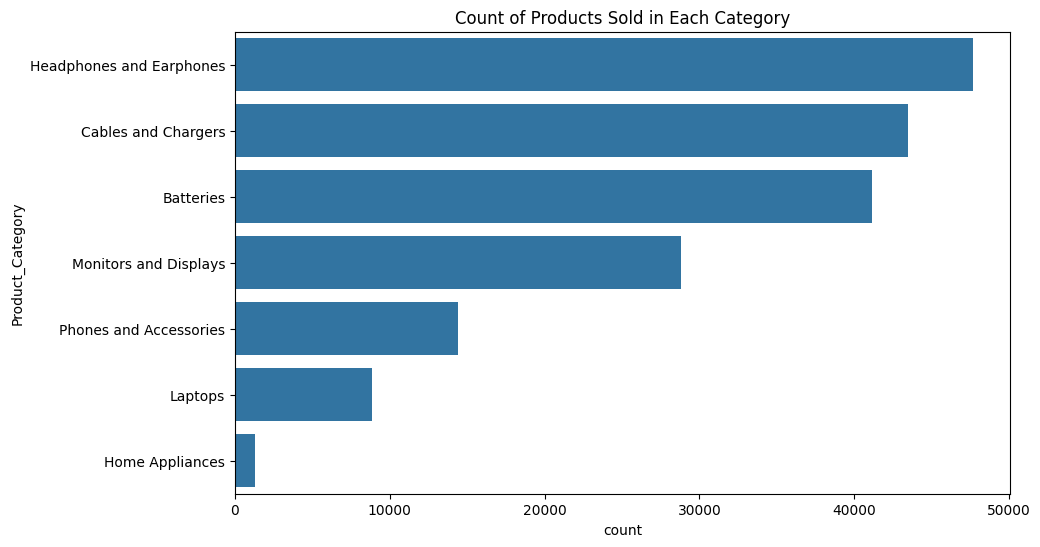

------------------------------------------------------------------------------------------------------------------------------------------------------


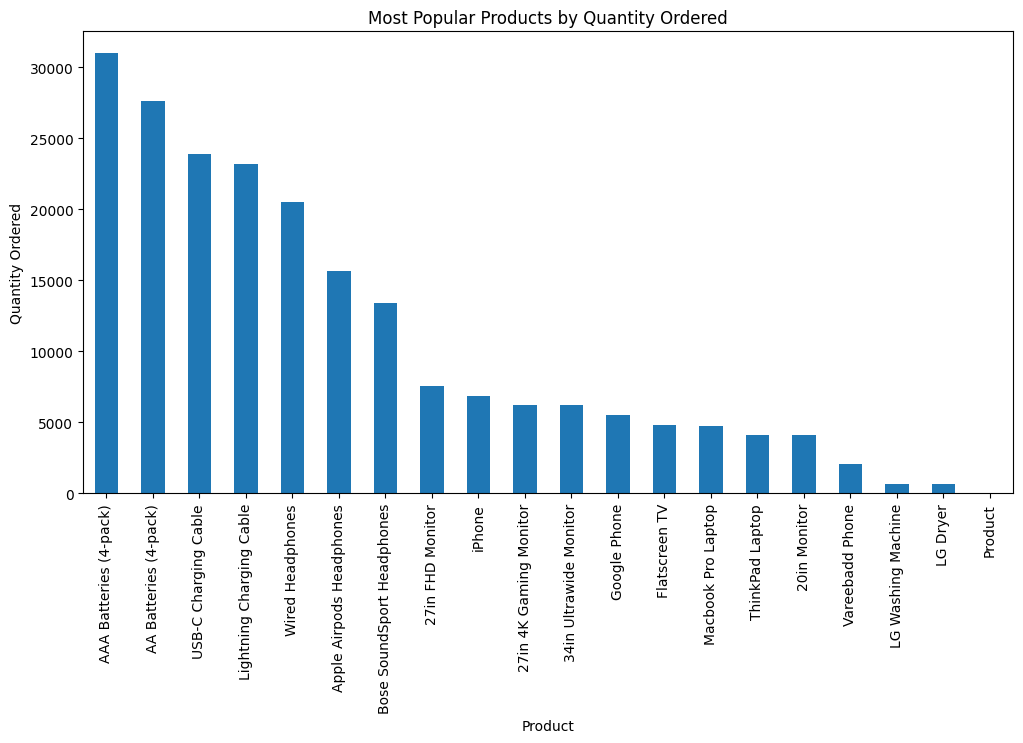

------------------------------------------------------------------------------------------------------------------------------------------------------


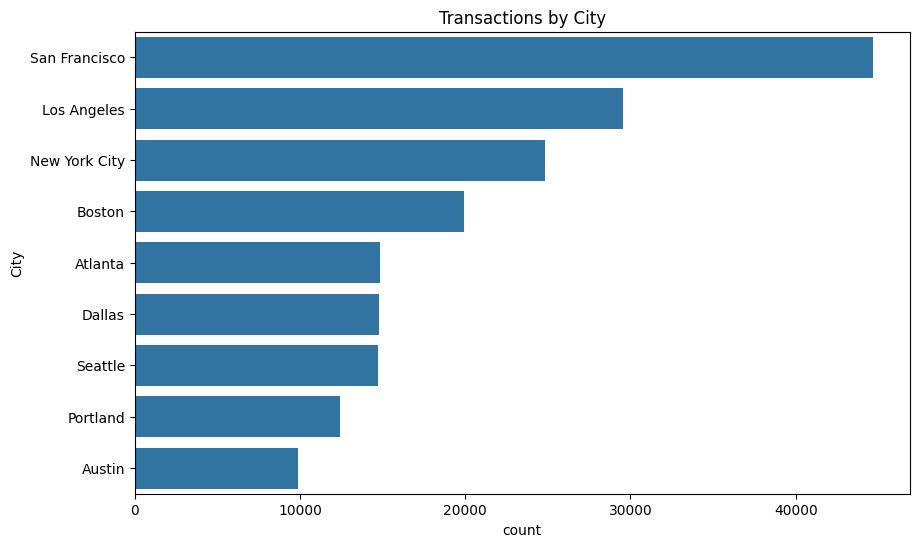

In [184]:
plt.figure(figsize=(10, 6))
sns.countplot(data=clean_df, y='Product_Category', order=clean_df['Product_Category'].value_counts().index)
plt.title('Count of Products Sold in Each Category')
plt.show()
print("-" *150)
plt.figure(figsize=(12, 6))
popular_products = clean_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending=False)
popular_products.plot(kind='bar')
plt.title('Most Popular Products by Quantity Ordered')
plt.ylabel('Quantity Ordered')
plt.show()
print("-" *150)
plt.figure(figsize=(10, 6))
sns.countplot(data=clean_df, y='City', order=clean_df['City'].value_counts().index)
plt.title('Transactions by City')
plt.show()

We will explore the distribution of the categorical columns like Product_Category and City

It can be observed that the ranking of unit items sold was topped by more affordable products. For example headphone, cables and batteries being more affordable than Home appliances, monitors or phone would therefore be purchased more. Additionally, due to mode of use and their nature of being smaller in size, such products either get missing or defective resulting in customers purchasing a new one/replacement; thus leading to a higher turnover rate of such products.

In analyzing the cities per transactions count, you will notice that the biggest cities (in terms of GDP) ranked the highest. This is likely because of the economic output in such regions (New York, Los Angeles & San Francisco) provides their residents will good income to be able to spend on these electronics.

### Bivariate Analysis
### Correlation between numerical columns
Here, we explore any possible correlation that exists between the numerical columns Quantity ordered and Price

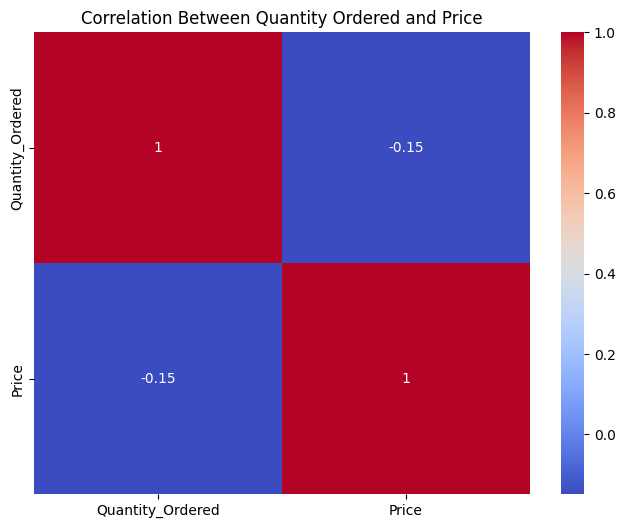

In [181]:
plt.figure(figsize=(8, 6))
sns.heatmap(clean_df[['Quantity_Ordered', 'Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Quantity Ordered and Price')
plt.show()


 A value of -0.15 suggests a weak negative relationship between the two variables. This means that as the price slightly increases, the quantity ordered tends to slightly decrease, but the relationship is weak and not very strong.

 Although the correlation is weak,it confirms our initial observation we made explored the categorical columns and observed that majority of the products sales were for products that are usually cheaper. This supports the correlation that the quantity ordered for the products in creases the lower the price is (inverse correlation)